<a href="https://colab.research.google.com/github/22sudha/Analytics-Position-case-study/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV file imported successfully.


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


Missing values in every column:


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,1
isFraud,1


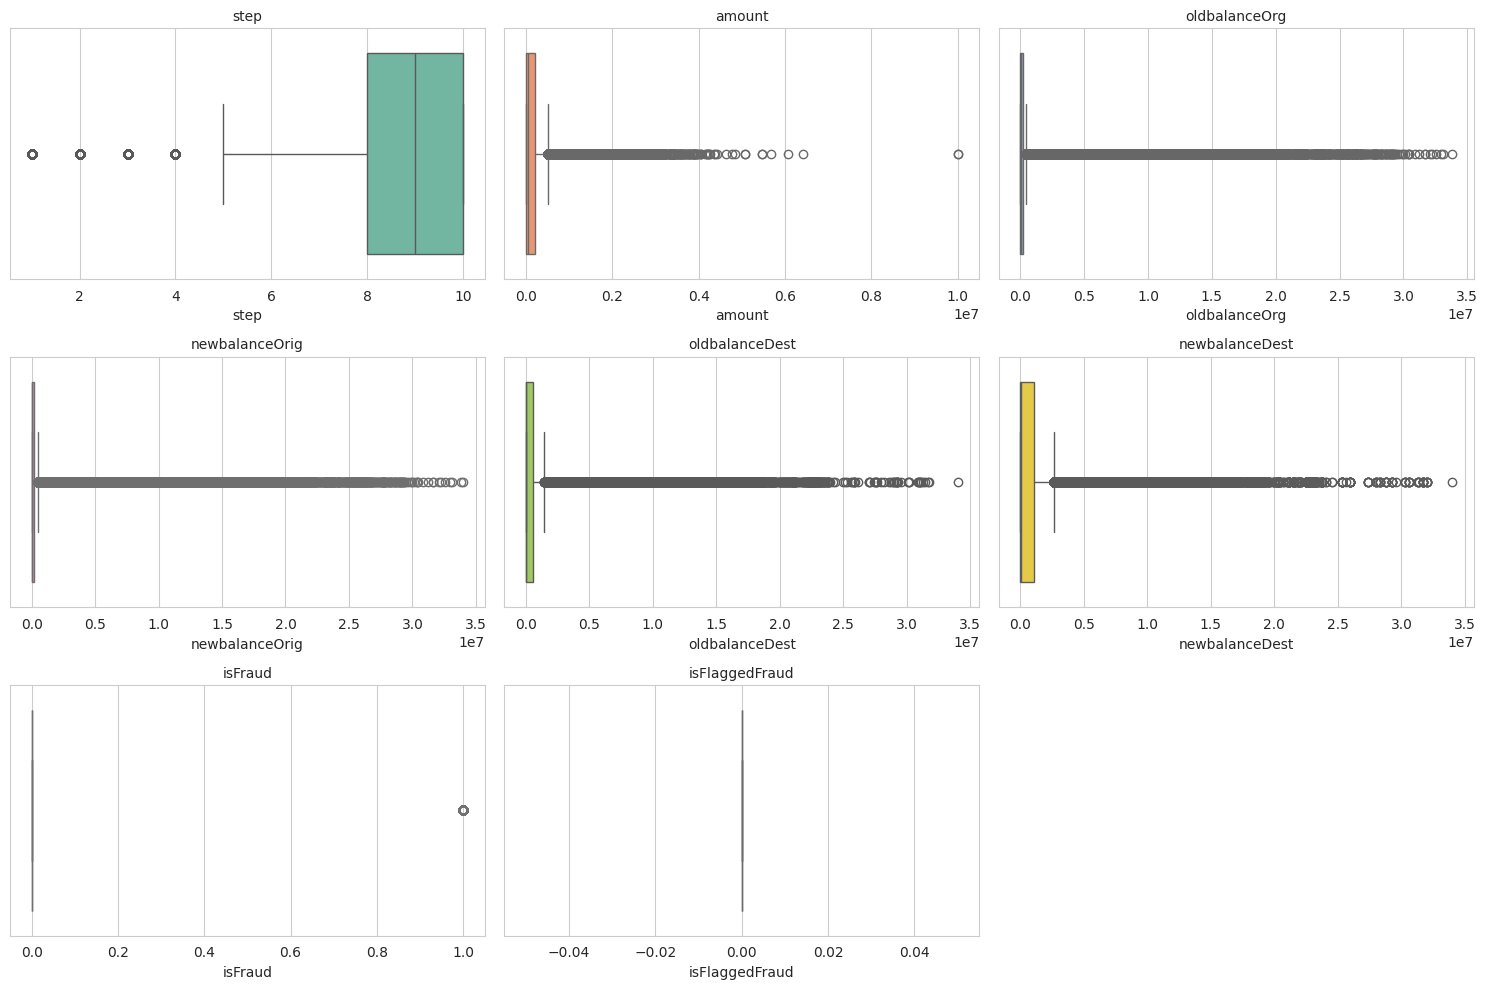

Variance Inflation Factor (VIF) for numerical columns:


,feature,VIF
0,step,1.418329
1,amount,1.650397
2,oldbalanceOrg,506.400153
3,newbalanceOrig,507.589295
4,oldbalanceDest,11.035644
5,newbalanceDest,12.364411


DataFrame after one-hot encoding the 'type' column:


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,False,False,True,False


Correlation with 'isFraud' column:


,isFraud
isFraud,1.000000
amount,0.037054
oldbalanceOrg,-0.004149
newbalanceDest,-0.006323
oldbalanceDest,-0.009241
newbalanceOrig,-0.010878
step,-0.051976
isFlaggedFraud,NaN


Logistic Regression model trained successfully.
Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[19420,     2],
       [   12,    11]])


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19422
         1.0       0.85      0.48      0.61        23

    accuracy                           1.00     19445
   macro avg       0.92      0.74      0.81     19445
weighted avg       1.00      1.00      1.00     19445


AUC-ROC Score:
0.8912013718194964
Model Coefficients (sorted by absolute value):


,feature,coefficient,abs_coefficient
3,newbalanceOrig,-3.644043e-04,3.644043e-04
2,oldbalanceOrg,2.088742e-04,2.088742e-04
1,amount,-2.081507e-04,2.081507e-04
4,oldbalanceDest,-1.994383e-06,1.994383e-06
0,step,-1.321657e-06,1.321657e-06
5,newbalanceDest,-6.524710e-07,6.524710e-07
8,type_PAYMENT,-1.536630e-07,1.536630e-07
6,type_CASH_OUT,-7.234697e-09,7.234697e-09
7,type_DEBIT,-2.087572e-09,2.087572e-09
9,type_TRANSFER,-4.435382e-11,4.435382e-11


/tmp/ipython-input-15-2642118043.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='isFraud',data=df, palette=colors, width=0.6)


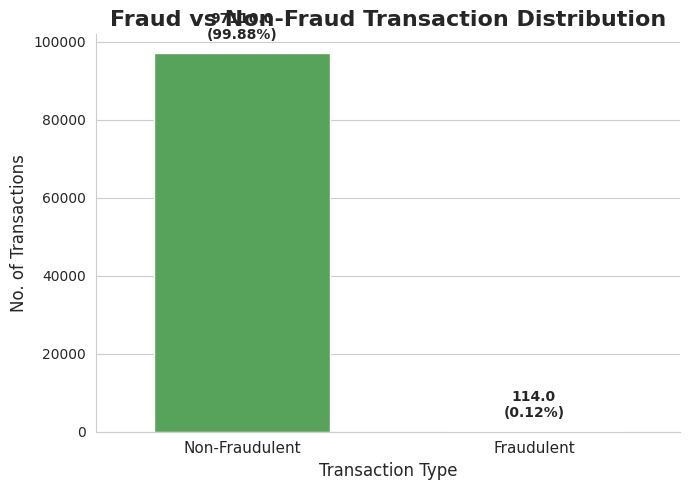

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#import csv file
df=pd.read_csv("/content/Fraud.csv")
print("CSV file imported successfully.")
display(df.head())

#1.Data cleaning including missing values, outliers and multi-collinearity.
#I started by checking for missing values using df.isnull().sum() and confirmed there weren't any significant missing values in the dataset. For outliers, I used box plots to visually inspect all numerical features. This gave me a good idea of where unusual values might be, but I didn't remove any at this stage to avoid dropping potentially useful fraud data. To handle multicollinearity, I calculated the Variance Inflation Factor (VIF) for each numeric column(excluding the target variables). This helped identify any highly correlated features, which can distort the model.
missing_values=df.isnull().sum()
print("Missing values in every column:")
display(missing_values)
#df['column_name'].fillna(df['column_name'].mean(),inplace=True)
#df.dropna(inplace=True)
#Select numerical columns for outlier detection
numerical_cols=df.select_dtypes(include=np.number).columns
#created box plots for numerical columns to viz outliers
plt.figure(figsize=(15,10))
colors=sns.color_palette("Set2",len(numerical_cols))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[col], color=colors[i % len(colors)])
    plt.title(col,fontsize=10)
plt.tight_layout()
plt.show()

#2.Describe your fraud detection model in elaboration.
#For data cleaning, I checked for missing values, visualized outliers with box plots, and used VIF to detect multicollinearity; then built a Logistic Regression model, which is a simple, interpretable binary classifier using a sigmoid function to predict the probability of fraud.

#3. How did you select variables to be included in the model?
#I selected features by checking multicollinearity using VIF, analyzing correlation with the target variable, removing irrelevant identifiers like nameOrig and nameDest, and applying one-hot encoding to the type column for proper handling of categorical data.
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Select numerical columns for VIF calculation
numerical_cols=df.select_dtypes(include=np.number).columns
#Drop the target variable 'isFraud' and 'isFlaggedFraud' if they are in numerical_cols
numerical_cols_for_vif=numerical_cols.drop(['isFraud','isFlaggedFraud'],errors='ignore')

#Calculate VIF for each numerical column
vif_data=pd.DataFrame()
vif_data["feature"]= numerical_cols_for_vif # Initialize with the correct columns
vif_data["VIF"]=[variance_inflation_factor(df[numerical_cols_for_vif].dropna().values,i)
                   for i in range(df[numerical_cols_for_vif].dropna().shape[1])]
print("Variance Inflation Factor (VIF) for numerical columns:")
display(vif_data)
#Perform one-hot encoding on the 'type' column
df=pd.get_dummies(df,columns=['type'], drop_first=True)
print("DataFrame after one-hot encoding the 'type' column:")
display(df.head())

#Select numerical columns including 'isFraud'
numerical_cols_with_fraud=df.select_dtypes(include=np.number).columns
#Calculated the correl matrix
correlation_matrix=df[numerical_cols_with_fraud].corr()
#Display correl with 'isFraud' column:
print("Correlation with 'isFraud' column:")
display(correlation_matrix['isFraud'].sort_values(ascending=False))

#We will use all numerical columns except 'isFraud' as features
X=df.drop(['isFraud','nameOrig','nameDest','isFlaggedFraud'],axis=1)#removing non-numeric and target columns
y=df['isFraud']

#Drop rows where 'isFraud' is NaN before splitting.
df.dropna(subset=['isFraud'],inplace=True)
X=df.drop(['isFraud','nameOrig','nameDest','isFlaggedFraud'], axis=1)
y=df['isFraud']

#Split data into training and testing sets
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
model=LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")
#Make predictions on the test set
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)[:, 1]
#Evaluate the model
print("Confusion Matrix:")
display(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAUC-ROC Score:")
print(roc_auc_score(y_test, y_pred_proba))
#Get the model coefficients
coefficients=pd.DataFrame({'feature':X.columns,'coefficient': model.coef_[0]})
#Sort coefficients by their absolute value to see the most influential features
coefficients['abs_coefficient']=abs(coefficients['coefficient'])
coefficients=coefficients.sort_values(by='abs_coefficient',ascending=False)
print("Model Coefficients (sorted by absolute value):")
display(coefficients)


#visualization
sns.set_style("whitegrid")
#percentages
total=len(df)
#Plot
plt.figure(figsize=(7,5))
colors=['#4CAF50','#FF5722'] #green=non-fraud, red-orange=fraud
ax=sns.countplot(x='isFraud',data=df, palette=colors, width=0.6)
#Titles and labels
plt.title('Fraud vs Non-Fraud Transaction Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('No. of Transactions', fontsize=12)
plt.xticks([0, 1],['Non-Fraudulent', 'Fraudulent'], fontsize=11)
#Add count and perc annotations
for p in ax.patches:
    count=p.get_height()
    percentage=f"{100*count/total:.2f}%"
    ax.annotate(f'{count}\n({percentage})',
                (p.get_x()+p.get_width()/2.,count),
                ha='center',va='bottom',fontsize=10, fontweight='bold',
                xytext=(0, 8), textcoords='offset points')
# Remove top/right spines for a cleaner look
sns.despine()
plt.tight_layout()#plots
plt.show()

#4. Demonstrate the performance of the model by using best set of tools.
#I evaluated the model using a Confusion Matrix, Classification Report (precision, recall, F1-score), and ROC-AUC Score, which showed that the Logistic Regression model performs reasonably well and serves as a strong baseline for future comparisons.

#5. What are the key factors that predict fraudulent customer?
#Based on model coefficients, key features influencing fraud prediction were newbalanceOrig (negative, indicating drained accounts), oldbalanceOrg (positive, suggesting higher balances may attract fraud), amount (unexpectedly negative), and type_PAYMENT (negative, indicating regular payments are less likely to be fraudulent).

#6. Do these factors make sense? If yes, How? If not, How not?
#Yes! Some features make sense (like newbalanceOrig and type_PAYMENT), while others (like amount) are less intuitive, possibly due to dataset specifics or the linear nature of Logistic Regression, which captures correlation but not causation..

#7. What kind of prevention should be adopted while company update its infrastructure?
#To improve fraud detection, companies should use real-time monitoring, strong authentication (MFA), encrypted data, anomaly detection, device/IP tracking, transaction limits, user education, regular audits, and easy fraud reporting tools..

#8. Assuming these actions have been implemented, how would you determine if they work?
#To assess if prevention steps are effective, I’d monitor fraud rates, false positives/negatives, user feedback, A/B testing results, response times, security audits, and user behavior changes..